In [5]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.19.0

numpy     : 1.19.4
scipy     : 1.5.4
sklearn   : 0.0
pandas    : 1.1.4
matplotlib: 3.3.3



In [6]:
import numpy as np
import pandas as pd

# Wine data

In [7]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
wine_pd = pd.DataFrame(data = np.c_[wine['data'], wine['target']], 
                        columns = wine['feature_names'] + ['target'])

In [10]:
wine_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Splite data

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine_pd, test_size = 0.2, random_state = 123)

In [12]:
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 142 to 109
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  tar

In [13]:
train_set.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,1.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0,1.0
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0,2.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0,2.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0.0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0,0.0


# Decision tree training and visualization

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 2, random_state = 42)
tree_clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, random_state = 42)

In [51]:
features = list(train_set.columns[:-1])
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [52]:
X = train_set[features]
y = train_set['target']
print(X)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
142    13.52        3.17  2.72               23.5       97.0           1.55   
8      14.83        1.64  2.17               14.0       97.0           2.80   
72     13.49        1.66  2.24               24.0       87.0           1.88   
114    12.08        1.39  2.50               22.5       84.0           2.56   
148    13.32        3.24  2.38               21.5       92.0           1.93   
..       ...         ...   ...                ...        ...            ...   
17     13.83        1.57  2.62               20.0      115.0           2.95   
98     12.37        1.07  2.10               18.5       88.0           3.52   
66     13.11        1.01  1.70               15.0       78.0           2.98   
126    12.43        1.53  2.29               21.5       86.0           2.74   
109    11.61        1.35  2.70               20.0       94.0           2.74   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [54]:
tree_clf.fit(X,y)
tree_clf2.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [55]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file = 'wine_tree.dot',
    feature_names = features,
    rounded = True,
    filled = True)


export_graphviz(
    tree_clf2,
    out_file = 'wine_tree22.dot',
    feature_names = features,
    rounded = True,
    filled = True)

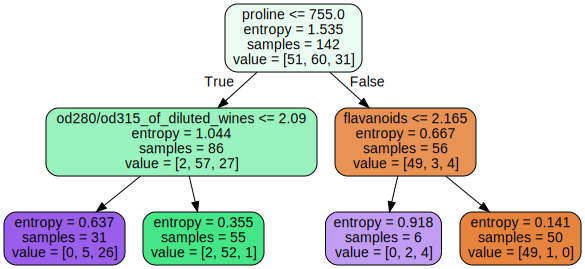

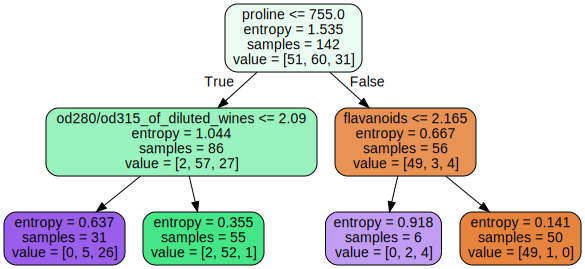

In [56]:
import graphviz
from IPython.display import display
with open('wine_tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'wine_tree', directory='./', cleanup = True)
display(dot)

with open('wine_tree22.dot') as ff:
    dot2_graph = ff.read()
dot2 = graphviz.Source(dot2_graph)
dot2.format = 'png'
dot2.render(filename = 'wine_tree22', directory='./', cleanup = True)
display(dot)

# Result of Decision Tree

In [20]:
X_test = test_set[features]
y_test = test_set['target']

In [21]:
y_pred = tree_clf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 1  9  1]
 [ 0  2 15]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       0.82      0.82      0.82        11
         2.0       0.94      0.88      0.91        17

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.89        36
weighted avg       0.89      0.89      0.89        36



# RandomForest using method bagging

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_clf = RandomForestClassifier( max_depth = 2,n_estimators=10 ,random_state = 42)
rf_clf.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [59]:
e = rf_clf.estimators_[3]
print(e)

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=787846414)


In [61]:
export_graphviz(e, out_file='rf_wine_tree.dot', 
                feature_names = wine.feature_names,
                class_names = wine.target_names,
                max_depth = 2, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

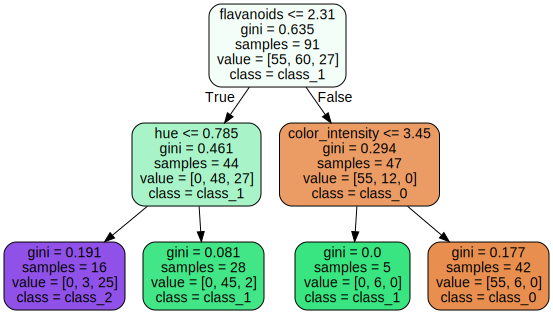

In [62]:
with open('rf_wine_tree.dot') as rf:
    rf_graph = rf.read()
rf = graphviz.Source(rf_graph)
rf.format = 'png'
rf.render(filename = 'rf_wine_tree', directory='./', cleanup = True)
display(rf)

In [63]:
X_test = test_set[features]
y_test = test_set['target']
y_pred2 = rf_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      0.91      0.95        11
         2.0       0.94      1.00      0.97        17

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



<AxesSubplot:>

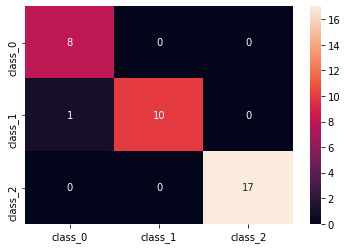

In [64]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=wine.target_names, index=wine.target_names)
sns.heatmap(data, annot=True)

# Ada using method boosting

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
ada_clf = AdaBoostClassifier(base_estimator = tree_clf,
                            n_estimators = 1000,
                             random_state = 42)
ada_clf.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2,
                                                         random_state=42),
                   n_estimators=1000, random_state=42)

In [74]:
a = ada_clf.estimators_[15]

In [75]:
export_graphviz(
    a,
    out_file = 'ada_wine_tree.dot',
    feature_names = features,
    rounded = True,
    filled = True)

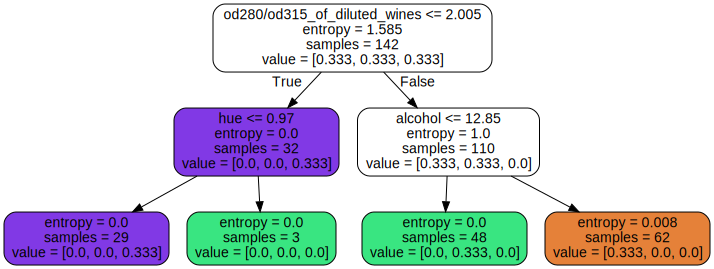

In [76]:
with open('ada_wine_tree.dot') as ada:
    ada_graph = ada.read()
ada = graphviz.Source(ada_graph)
ada.format = 'png'
ada.render(filename = 'ada_wine_tree', directory='./', cleanup = True)
display(ada)

In [35]:
X_test = test_set[features]
y_test = test_set['target']
y_pred = ada_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        17

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



<AxesSubplot:>

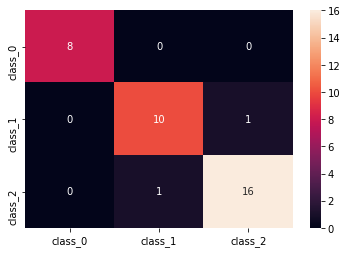

In [36]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=wine.target_names, index=wine.target_names)
sns.heatmap(data, annot=True)

# Gradient Boosting using method boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gbm_clf = GradientBoostingClassifier( n_estimators = 10, max_depth = 2, random_state =42)
gbm_clf.fit(X, y)

GradientBoostingClassifier(max_depth=2, n_estimators=10, random_state=42)

In [39]:
# Get the tree number 42
sub_tree_3 = gbm_clf.estimators_[3, 0]

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image

dot_data = export_graphviz(
    sub_tree_3,
    out_file='gbm_wine_tree.dot', 
    feature_names = features,
    rounded = True,
    filled = True, )# enable them if you want



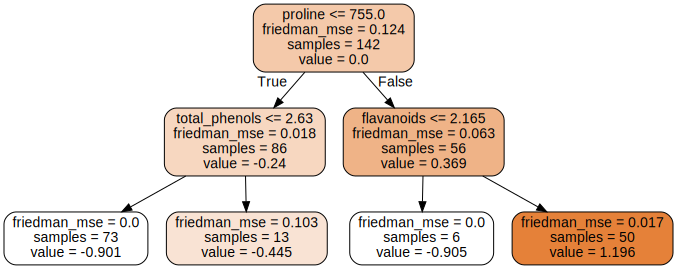

In [40]:
with open('gbm_wine_tree.dot') as gbm:
    gbm_graph = gbm.read()
gbm = graphviz.Source(gbm_graph)
gbm.format = 'png'
gbm.render(filename = 'gbm_wine_tree', directory='./', cleanup = True)
display(gbm)

In [41]:
X_test = test_set[features]
y_test = test_set['target']
y_pred = gbm_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 1 10  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00        17

    accuracy                           0.97        36
   macro avg       0.96      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36



In [42]:
import numpy as np
from matplotlib import pyplot as plt
def show(model):
    n_features = wine.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    
    plt.yticks(np.arange(n_features), wine.feature_names)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.show()

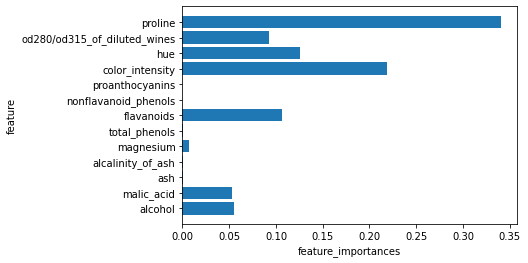

In [43]:
show(gbm_clf)

In [47]:
!pip install pydot
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [48]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

In [49]:
plot_decision_regions(X, y, tree_clf, "Depth 1")
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key